# Ejercicio 3 — Método de la transformada inversa: distribución de Fisher–Tippett 

Objetivo general. Diseñar, implementar y verificar una función que genere valores aleatorios con distribución de Fisher–Tippett usando el método de la transformada inversa.
En este trabajo se usa el caso ξ = 0, con μ = 0 y λ = 1/σ = 1.

### 1. PDF de Fisher–Tippett : Funcion de densidad

La distribucion de Fisher-Tippett o Distribucion del Valor Extremo Generalizada (GEV) viene dada por:

$
f(x) = \frac{1}{\sigma} (e^{-\frac{x-\mu}{\sigma}})^{\xi + 1} \exp\!\left(-e^{-\frac{x-\mu}{\sigma}}\right), \quad x \in \mathbb{R}.
$

Se usa el caso $\xi = 0$ con $\mu = 0$ y $\lambda = 1/\sigma=1$:

$
\boxed{f(x) = e^{-x}\,\exp\!\left(-e^{-x}\right)}
$


### 2. CDF : Funcion de distribucion acumulada

Partimos de:

$
F(x) = \int_{-\infty}^x f(x') \, dx'.
$

Usando el cambio de variable $t = e^{-(x-\mu)/\sigma}$, se obtiene:

$
F(x) = \exp\!\left(-e^{-\frac{x-\mu}{\sigma}}\right).
$

Con $\mu = 0$ y $\lambda = 1/\sigma=1$:

$
\boxed{F(x) = \exp(-e^{-x})}.
$


### 3. Inversa de la CDF (para el método de la transformada inversa)

Sea $y = F(x) = \exp(-e^{-(x-\mu)/\sigma})$.  
Invertimos paso a paso:

$
-\ln y = e^{-(x-\mu)/\sigma}
$

$
\ln(-\ln y) = -\frac{x-\mu}{\sigma}
$

$
x = \mu - \sigma \ln(-\ln y).
$

Finalmente:

$
\boxed{x = -\ln(-\ln y)}.
$



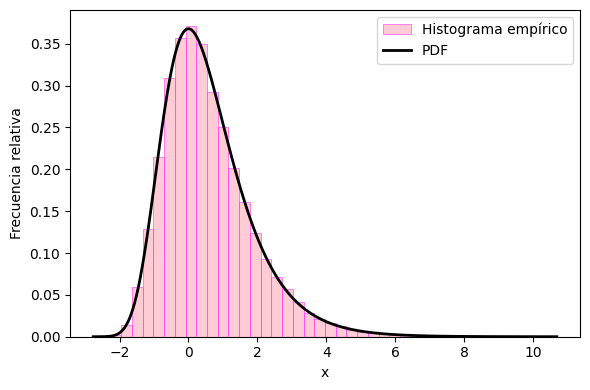

In [3]:
#importamos librerias para calculo numerico y graficado
import numpy as np
import matplotlib.pyplot as plt

N = 30000 # cantidad de números aleatorios a generar

# Muestra por transformada inversa: x = -ln(-ln(u))
u = np.random.rand(N) #genera N números aleatorios uniformes en (0,1)
x = -np.log(-np.log(u)) #aplicación de la inversa de la CDF

# Histogram y PDF teórica 
bins = 40 #numeros de bins para el histograma
fig, ax = plt.subplots(figsize=(6,4)) #creo figura y ejes
#dibuja histograma con area normalizada a 1 (densidad normalizada) - Density=true para comparar con PDF teorica
ax.hist(x, bins=bins, density=True, alpha=0.8, label='Histograma empírico', color='pink', edgecolor='fuchsia', linewidth=0.4)

xs = np.linspace(x.min()-0.5, x.max()+0.5, 1000) #rango de x para la PDF teórica
pdf = np.exp(-xs - np.exp(-xs))  # evalua la pdf teorica f(x) = exp(-x) * exp(-exp(-x)) = exp(-x - exp(-x))
ax.plot(xs, pdf, color='black', linewidth=2, label='PDF') #superpone la PDF teorica

ax.set_xlabel('x')
ax.set_ylabel('Frecuencia relativa')
ax.legend(frameon=True)
plt.tight_layout()
plt.savefig('gumbel_hist.png', dpi=300, bbox_inches='tight')
plt.show()


In [4]:
# Cálculo de la media empírica y comparación con la teórica
# La media teórica de la distribución es γ (constante de Euler)
gamma = 0.57721566490153286060  # Constante de Euler
u_clipped = np.clip(u, 1e-12, 1-1e-12) # Evita log(0)

media_emp = x.mean()
media_teor = gamma
diff = media_emp - media_teor

print(f"{media_emp:.6f}")
print(f"{media_teor:.6f}")
print(f"{diff:.6e}")

0.574362
0.577216
-2.853485e-03
